In [1]:
from PIL import Image, ImageDraw
from io import BytesIO
import json
import joblib
import os
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

random.seed(25)

LT_PATH = './imagenet_sup_intra_lt_inter_lt.json'
BL_PATH = './imagenet_sup_intra_lt_inter_bl.json'

In [2]:
lt_annotation = json.load(open(LT_PATH))
bl_annotation = json.load(open(BL_PATH))

In [3]:
def show_statistics(vals):
    # sort your values in descending order
    indSort = np.argsort(vals)[::-1]
    # rearrange your data
    att_values = np.array(vals)[indSort]
    indexes = np.arange(len(vals))
    bar_width = 0.35
    plt.bar(indexes, att_values)
    plt.show()

In [4]:
lt_annotation.keys()

dict_keys(['cat2id', 'id2cat', 'train', 'val', 'test_lt', 'test_bl', 'test_bbl'])

In [5]:
def duplication_check(annotation):
    count = 0
    all_img = []
    all_set = ['train', 'val', 'test_lt', 'test_bl', 'test_bbl']
    
    for key in all_set:
        count += len(annotation[key]['label'])
        all_img = all_img + list(annotation[key]['label'].keys())
    
    all_img = set(all_img)
    print('Counting Result: {}'.format(count))
    print('Number of Images: {}'.format(len(all_img)))

In [6]:
duplication_check(lt_annotation)

Counting Result: 323460
Number of Images: 323460


In [7]:
duplication_check(bl_annotation)

Counting Result: 264000
Number of Images: 264000


In [8]:
def count_label_dist(dataset, num_cls=1000):
    cls_sizes = [0] * num_cls
    for key, val in dataset['label'].items():
        cls_sizes[int(val)] += 1
    print(len(dataset['label']))
    return cls_sizes

In [9]:
def count_attribuate_dist(dataset, num_cls=6):
    cls_sizes = [0] * num_cls
    for key, val in dataset['attribute'].items():
        cls_sizes[int(val)] += 1
    print(len(dataset['attribute']))
    return cls_sizes

113460


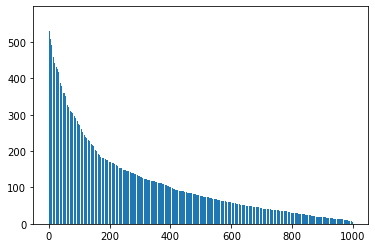

In [10]:
show_statistics(count_label_dist(lt_annotation['train']))

30000


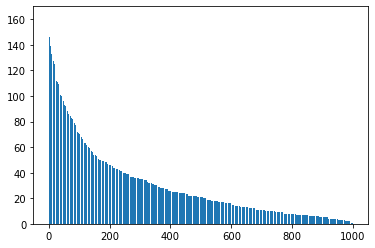

In [11]:
show_statistics(count_label_dist(lt_annotation['val']))

60000


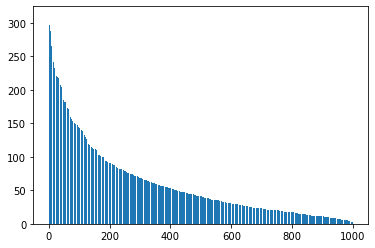

In [12]:
show_statistics(count_label_dist(lt_annotation['test_lt']))

60000


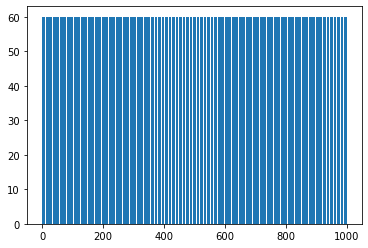

In [13]:
show_statistics(count_label_dist(lt_annotation['test_bl']))

60000


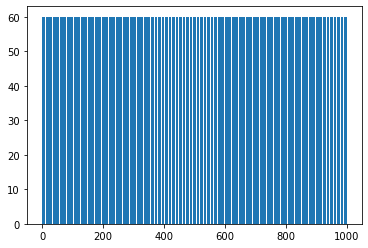

In [14]:
show_statistics(count_label_dist(lt_annotation['test_bbl']))

114000


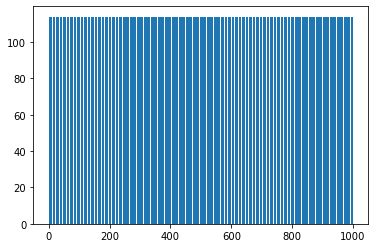

In [15]:
show_statistics(count_label_dist(bl_annotation['train']))

30000


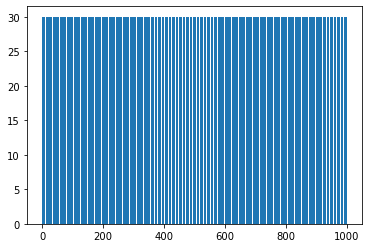

In [16]:
show_statistics(count_label_dist(bl_annotation['val']))

0


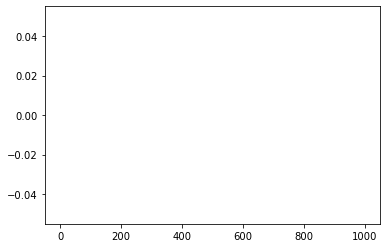

In [17]:
show_statistics(count_label_dist(bl_annotation['test_lt']))

60000


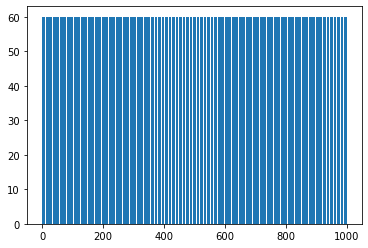

In [18]:
show_statistics(count_label_dist(bl_annotation['test_bl']))

60000


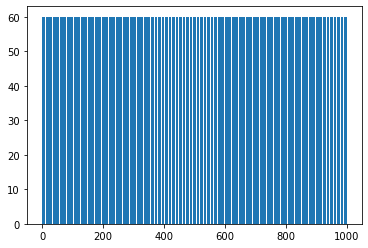

In [19]:
show_statistics(count_label_dist(bl_annotation['test_bbl']))

113460


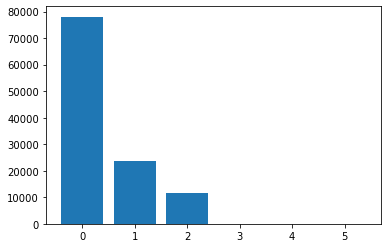

In [20]:
show_statistics(count_attribuate_dist(lt_annotation['train']))

30000


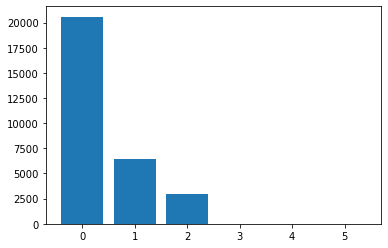

In [21]:
show_statistics(count_attribuate_dist(lt_annotation['val']))

60000


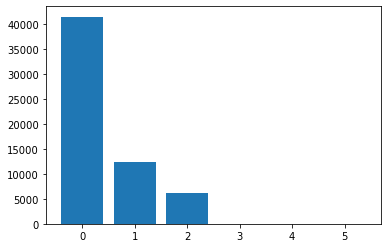

In [22]:
show_statistics(count_attribuate_dist(lt_annotation['test_lt']))

60000


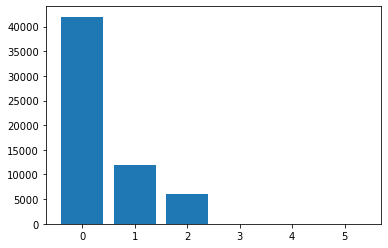

In [23]:
show_statistics(count_attribuate_dist(lt_annotation['test_bl']))

60000


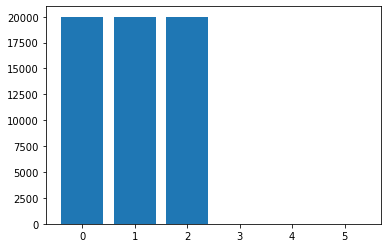

In [24]:
show_statistics(count_attribuate_dist(lt_annotation['test_bbl']))

114000


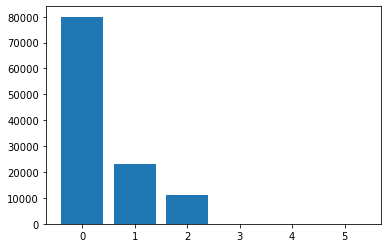

In [25]:
show_statistics(count_attribuate_dist(bl_annotation['train']))

30000


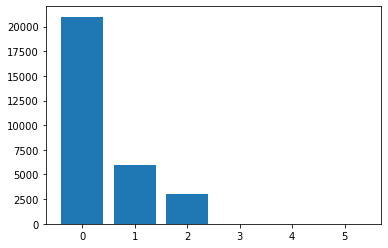

In [26]:
show_statistics(count_attribuate_dist(bl_annotation['val']))

0


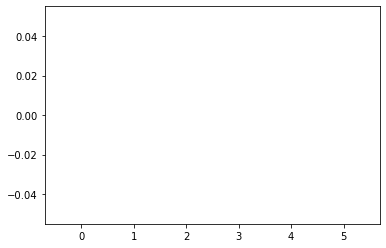

In [27]:
show_statistics(count_attribuate_dist(bl_annotation['test_lt']))

60000


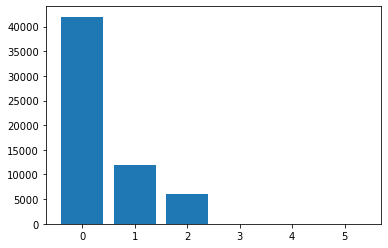

In [28]:
show_statistics(count_attribuate_dist(bl_annotation['test_bl']))

60000


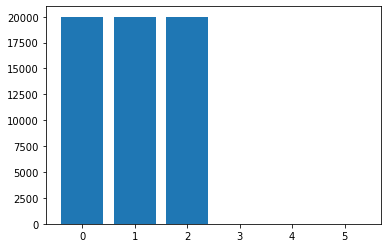

In [29]:
show_statistics(count_attribuate_dist(bl_annotation['test_bbl']))